In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# no this module: from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MyopiaData = pd.read_csv("myopia.csv")

In [3]:
MyopiaData.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


Here is our dataset dictionary: https://www.umass.edu/statdata/statdata/data/myopia.pdf

#### We are interested in finding out what contributes to Myopia the most. My grandmother always told me not to watch TV or play with computer. Her hypothesis was that they will cause Myopia. (She was strangely fine with studying!). It sounds like Drs share the same point of view with my grandmother " http://www.allaboutvision.com/conditions/myopia.htm "

#### We are DataScientist and don't trust our grandmothers or DRs unless we find the same result! Now, let's go and explore Myopia!




In [4]:
# Year of study and id should not affect anything so we disregard them in this study. 
# we consider two types of inputs - first all general inputs - i.e. physical and external inputs
# second only external inputs
X1 = MyopiaData[['SPHEQ','AL','ACD','LT','VCD','AGE','GENDER','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']]
X2 = MyopiaData[['AGE','GENDER','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']]
y = MyopiaData['MYOPIC']


Run your regression line on X1 and interpret your MOMMY AND DADMY coefficients. Assume variables are significant. Use sklearn 

In [5]:
lm = LogisticRegression(solver = 'newton-cg', max_iter = 100000)
lm.fit(X1, y)

#get the column names
NameOfVariables = X1.columns.values
list(zip([NameOfVariables], lm.coef_))
#print(lm.intercept_)

[(array(['SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'AGE', 'GENDER', 'SPORTHR',
         'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY',
         'DADMY'], dtype=object),
  array([-3.4114842 ,  0.01506597,  0.76417271, -0.44270495, -0.2886341 ,
         -0.00691405,  0.5038171 , -0.04742357,  0.09741004,  0.04902041,
         -0.13122663, -0.00426283, -0.00767177,  0.63964875,  0.71626816]))]

Answer: The result shows that if a child's mother or farther is Myopia, the probability of this child is Myopia will increase by 63.96% and 71.63%.

#### Use confusion matrix and estimate False negative rate and False positive rate

In [6]:
y_hat = lm.predict(X1)
confusion_matrix(y, y_hat)

array([[524,  13],
       [ 53,  28]], dtype=int64)

In [7]:
confmat = confusion_matrix(y, y_hat)
TN = confmat[0,0] #True Negative
FN = confmat[1,0] #False Negative
FP = confmat[0,1] #False Positive
TP = confmat[1,1] #True Positive

In [8]:
Err = float(FP + FN)/(FP + FN + TP + TN) #Prediction Error
Acc = float(TP + TN)/(FP + FN + TP + TN) #Prediction Accuracy
FPR = float(FP)/(FP + TN)  #False Positive Rate
TNR = float(TN)/(FP + TN)  #True Negative Rate
TPR = float(TP)/(FN + TP)  #True Positive Rate
FNR = float(FN)/(FN + TP)  #False Negative Rate
print("False Positive Rate = %f" %FPR)
print("False Negative Rate = %f" %FNR)
print("True Positive Rate = %f" %TPR)
print("True Negative Rate = %f" %TNR)
print("Misclassification Error = %f" %Err)
print("Accuracy = %f" %Acc)

False Positive Rate = 0.024209
False Negative Rate = 0.654321
True Positive Rate = 0.345679
True Negative Rate = 0.975791
Misclassification Error = 0.106796
Accuracy = 0.893204


False Negative Rate is 0.654321, 
False Positive Rate is 0.024209. 

#### Use 10-fold cross-validation to measure accuracy of your predictions

In [9]:
print(cross_val_score(lm, X1, y,cv=10).mean()) 


0.883521358481697


#### In your dataset, what percentage of cases are myopic?

In [10]:
MyopiaData['MYOPIC'].mean() #13.1 of cases are myopic

0.13106796116504854

#### Based on the result you found above, is your prediction precision good or bad?

Answer: I think our prediction precision is good since the measure accuracy rate is around 88%.

#### Imagine you would like to decrease your False Positive Rate. Change threshhold and show how FPR, FNR, and total error change by changing Threshhold.

In [11]:
def PredictThreshhold(Predictprob, Threshhold): 
        y_predict = 0
        if (Predictprob >= Threshhold):
            y_predict = 1
        return y_predict
   

In [12]:
y_hat_probability = lm.predict_proba(X1).T[1]
# Set Thresshold = 0.2
y_hat_predict_threshhold= []
for i in range(0,len(y_hat_probability)):
        y_hat_predict_threshhold.append(PredictThreshhold(y_hat_probability[i], .2))
print(confusion_matrix(y, y_hat_predict_threshhold))

[[470  67]
 [ 21  60]]


In [13]:
# Set Thresshold = 0.5
y_hat_predict_threshhold= []
for i in range(0,len(y_hat_probability)):
        y_hat_predict_threshhold.append(PredictThreshhold(y_hat_probability[i], .5))
print(confusion_matrix(y, y_hat_predict_threshhold))

[[524  13]
 [ 53  28]]


In [14]:
# Set Thresshold = 0.75
y_hat_predict_threshhold= []
for i in range(0,len(y_hat_probability)):
        y_hat_predict_threshhold.append(PredictThreshhold(y_hat_probability[i], .75))
print(confusion_matrix(y, y_hat_predict_threshhold))

[[537   0]
 [ 71  10]]


Answer: As the Thresshold increase, the False Positive Rate will decrease. Also, the False Negative Rate will increase, but the total Error won't change a lot. 

#### Now let's run a logistic regression line on X2 and see if we can confirm our Grandmothers' claims! Use StatsModels api.

In [15]:
import statsmodels.api as sm
MyopiaData['Intercept'] = 1
X2 = MyopiaData[['AGE','GENDER','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY', 'Intercept']]
y = MyopiaData['MYOPIC']

logit = sm.Logit(y, X2)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.354054
         Iterations 19


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 MYOPIC   No. Observations:                  618
Model:                          Logit   Df Residuals:                      608
Method:                           MLE   Df Model:                            9
Date:                Sat, 11 Apr 2020   Pseudo R-squ.:                 0.08846
Time:                        17:14:06   Log-Likelihood:                -218.81
converged:                       True   LL-Null:                       -240.04
Covariance Type:            nonrobust   LLR p-value:                 2.700e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.2744      0.193      1.423      0.155      -0.104       0.652
GENDER         0.4241      0.265      1.599      0.110      -0.096       0.944
SPORTHR       -0.0425      0.018     -2.329      0.020      -0.078      -0.007
READHR         0.0896        nan        nan        nan         nan         nan
COMPHR         0.0295        nan        nan        nan         nan         nan
STUDYHR       -0.1104        nan        nan        nan         nan         nan
TVHR           0.0048        nan        nan        nan         nan         nan
DIOPTERHR      0.0015        nan        nan        nan         nan         nan
MOMMY          0.8701      0.262      3.317      0.001       0.356       1.384
DADMY          1.0250      0.265      3.864      0.000       0.505       1.545
Intercept     -4.7493      1.287     -3.689      0.000      -7.273      -2.226
==============================================================================
"""

#### Interpret your results specifically on StudyHr, TVH, and COMPHR: 

Answer: Before the standarlization, I think although TV and Computer hour has positive influence on the probability of get Myopic and Study hour has negative influence of the probability, the impact is not significant camparing to Age and Gender. 

#### Now it's time for regularization and choosing the best predictors:

In [16]:
#Let's Standardize our outputs first
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

MyopiaData['AGE_STD'] = Standardize(MyopiaData.AGE)
MyopiaData['SPORTHR_STD'] = Standardize(MyopiaData.SPORTHR)
MyopiaData['READHR_STD'] = Standardize(MyopiaData.READHR)
MyopiaData['COMPHR_STD'] = Standardize(MyopiaData.COMPHR)
MyopiaData['STUDYHR_STD'] = Standardize(MyopiaData.STUDYHR)
MyopiaData['TVHR_STD'] = Standardize(MyopiaData.TVHR)
MyopiaData['DIOPTERHR_STD'] = Standardize(MyopiaData.DIOPTERHR)

y = MyopiaData['MYOPIC']
X3 = MyopiaData[['AGE_STD','GENDER','SPORTHR_STD','READHR_STD','COMPHR_STD','STUDYHR_STD',
                 'TVHR_STD','DIOPTERHR_STD','MOMMY','DADMY']]


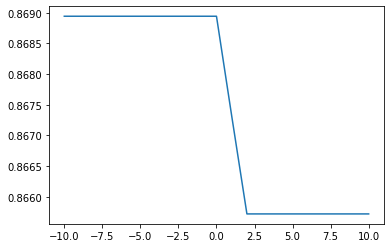

Our optimal C is 0.000000
Our accuracy at optimal C is 0.868945


In [17]:
# Try testing and plot
c_list = np.logspace(-10,10,21) 
c_index = np.linspace(-10,10,21)
#C is just the inverse of Lambda - the smaller the C - the stronger the
#regulatization. The smaller C's choose less variables
cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score,  solver = 'liblinear', max_iter  = 10000, penalty = 'l1')
    cv_scores.append(cross_val_score(lm, X3, y,cv = 5, scoring = 'accuracy').mean())

plt.plot(c_index, cv_scores)
plt.show()

print("Our optimal C is %f" %c_list[np.argmax(cv_scores)])   
print("Our accuracy at optimal C is %f" %np.max(cv_scores))


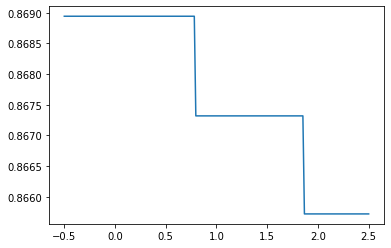

Our optimal C is 0.316228
Our accuracy at optimal C is 0.868945


In [18]:
### You can localize your search once you have an idea of where to search for the optimal solution

c_list = np.logspace(-0.5,2.5,200) 
c_index = np.linspace(-0.5,2.5,200)
cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score,  solver = 'liblinear', max_iter  = 10000, penalty = 'l1')
    cv_scores.append(cross_val_score(lm, X3, y,cv = 5, scoring = 'accuracy').mean())

plt.plot(c_index, cv_scores)
plt.show()

print("Our optimal C is %f" %c_list[np.argmax(cv_scores)])   
print("Our accuracy at optimal C is %f" %np.max(cv_scores))

In [19]:
lm = LogisticRegression(C = 0.316228,  solver = 'liblinear', max_iter  = 10000, penalty = 'l1')
lm.fit(X3,y)
print(lm.coef_)

[[ 0.          0.09262312 -0.47605371  0.          0.          0.
   0.          0.          0.51483392  0.61951277]]


In [20]:
#get the column names
NameOfVariables = X3.columns.values
#sort the variables
Var_coef = zip(lm.coef_[0,:],NameOfVariables)
sorted(Var_coef)

[(-0.4760537100456939, 'SPORTHR_STD'),
 (0.0, 'AGE_STD'),
 (0.0, 'COMPHR_STD'),
 (0.0, 'DIOPTERHR_STD'),
 (0.0, 'READHR_STD'),
 (0.0, 'STUDYHR_STD'),
 (0.0, 'TVHR_STD'),
 (0.09262312078047596, 'GENDER'),
 (0.5148339184339927, 'MOMMY'),
 (0.6195127668797303, 'DADMY')]

#### What is your conclusions about your Grandmothers' and some other Drs' claims?

Answer: Based on the conclusion, the Grandmothers' view is unsupport by our model. Sport hour, Gender, Daddy and Mommy are the most important variables for Myopia.

#### Draw ROC curve for your best tuned model. 

In [21]:
y_hat = lm.predict(X3)
confusion_matrix(y, y_hat)

array([[537,   0],
       [ 81,   0]], dtype=int64)

0.6884612731912545


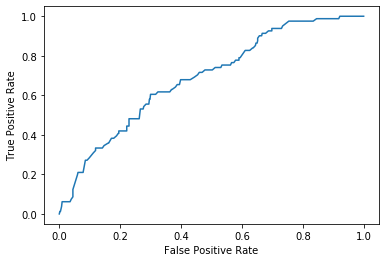

In [22]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_hat_probability = lm.predict_proba(X3).T[1]  #T[1] returns probability of belonging to class
print(roc_auc_score(y, y_hat_probability))
vals = roc_curve(y, y_hat_probability)

plt.plot(vals[0], vals[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()